# Aula 14 - LSTM - Estrutura, Funcionamento e Aplicações

- **Motivação para LSTM:**
  - Limitações das RNNs tradicionais
  - Problema de desvanecimento e explosão de gradientes
  - Necessidade de capturar dependências de longo prazo

## Antes de Falar Sobre as Redes LSTM

## Problema de Gradiente de Desvanecimento e Explosão

### O Que é o Problema de Gradiente de Desvanecimento?

- **Definição:**
  - O problema de gradiente de desvanecimento ocorre durante o treinamento de redes neurais profundas, especialmente em Redes Neurais Recorrentes (RNNs). Isso acontece quando os gradientes das funções de perda em relação aos pesos se tornam muito pequenos, resultando em ajustes insignificantes nos pesos da rede.

- **Causa:**
  - Durante a retropropagação, os gradientes são multiplicados repetidamente pela derivada das funções de ativação ao longo de várias camadas ou passos de tempo. Se essas derivadas forem menores que 1, os gradientes diminuem exponencialmente, tornando-se quase nulos.
  - Isso é comum em funções de ativação como a sigmoide ou a tangente hiperbólica, cujas derivadas estão entre 0 e 1.

- **Efeito:**
  - Quando os gradientes se tornam muito pequenos, a rede neural para de aprender porque as atualizações dos pesos são insignificantes.
  - Como resultado, a rede tem dificuldade em capturar dependências de longo prazo nos dados, afetando negativamente o desempenho em tarefas que requerem memorização de informações antigas.

### O Que é o Problema de Explosão de Gradiente?

- **Definição:**
  - O problema de explosão de gradiente ocorre quando os gradientes das funções de perda em relação aos pesos se tornam muito grandes durante a retropropagação. Isso resulta em grandes atualizações nos pesos, que podem levar à instabilidade do modelo.

- **Causa:**
  - Assim como no problema de desvanecimento, durante a retropropagação, os gradientes são multiplicados repetidamente pela derivada das funções de ativação. Se essas derivadas forem maiores que 1, os gradientes aumentam exponencialmente.
  - Redes neurais profundas ou RNNs que usam funções de ativação não saturadas, como ReLU, são particularmente suscetíveis a esse problema.

- **Efeito:**
  - Quando os gradientes se tornam muito grandes, as atualizações dos pesos são descontroladas, levando a oscilações na função de perda e instabilidade no treinamento.
  - O modelo pode não convergir e, em vez disso, divergir, resultando em desempenho pobre ou falha completa do treinamento.

### Como Esses Problemas Afetam o Treinamento?

- **Gradiente de Desvanecimento:**
  - Dificulta a aprendizagem de dependências de longo prazo.
  - Redes neurais podem parar de aprender após algumas iterações de treinamento.
  - Afeta a capacidade de a rede capturar padrões importantes em dados sequenciais.

- **Explosão de Gradiente:**
  - Pode levar a atualizações de pesos extremamente grandes, fazendo com que o modelo se torne instável.
  - Resulta em flutuações significativas na função de perda, tornando difícil a convergência.
  - Pode causar a saturação dos neurônios, onde os pesos assumem valores extremos, levando à perda de capacidade de generalização do modelo.

### Métodos para Mitigar os Problemas de Gradiente

- **Para Gradiente de Desvanecimento:**
  - **LSTMs e GRUs:** Estas arquiteturas de RNNs foram projetadas para lidar com o problema de desvanecimento de gradientes, graças às suas estruturas de portas que regulam o fluxo de informações.
  - **Inicialização Adequada de Pesos:** Utilizar métodos como inicialização de Xavier ou He para manter os gradientes em uma faixa adequada.
  - **Funções de Ativação Alternativas:** Utilizar funções de ativação que não sofram tanto com o desvanecimento de gradientes, como ReLU.

- **Para Explosão de Gradiente:**
  - **Clipping de Gradiente:** Técnica que limita o valor dos gradientes a um intervalo predefinido durante a retropropagação, prevenindo atualizações excessivamente grandes.
  - **Regularização:** Métodos como dropout e regularização L2 podem ajudar a controlar o crescimento dos pesos.
  - **Uso de Otimizadores Adaptativos:** Otimizadores como Adam, RMSprop e AdaGrad ajustam a taxa de aprendizado com base nos gradientes, ajudando a prevenir a explosão de gradientes.

## Estrutura das LSTM
- **Componentes Principais:**
  - **Célula de Memória:** 
    - Função: Mantém informações ao longo do tempo.
    - Papel: Atua como um meio para armazenar informações relevantes para longas sequências de dados, possibilitando a captura de dependências de longo prazo.
  
  - **Porta de Entrada (Input Gate):** 
    - Função: Decide quais informações da entrada atual atualizar na célula de memória.
    - Detalhamento:
      - Calcula uma função sigmoide que determina quais valores da entrada atual devem ser armazenados na célula de memória.
      - Equação: \( i_t = \sigma(W_i \cdot [h_{t-1}, x_t] + b_i) \)
      - \( \sigma \) representa a função sigmoide que gera valores entre 0 e 1, indicando a importância da atualização.

  - **Porta de Esquecimento (Forget Gate):**
    - Função: Decide quais informações antigas na célula de memória descartar.
    - Detalhamento:
      - Calcula uma função sigmoide que determina quais valores da célula de memória devem ser esquecidos.
      - Equação: \( f_t = \sigma(W_f \cdot [h_{t-1}, x_t] + b_f) \)
      - \( \sigma \) representa a função sigmoide que gera valores entre 0 e 1, indicando a importância da manutenção das informações.

  - **Porta de Saída (Output Gate):**
    - Função: Decide quais informações da célula de memória usar na saída atual.
    - Detalhamento:
      - Calcula uma função sigmoide que determina quais valores da célula de memória devem ser usados para a saída.
      - Equação: \( o_t = \sigma(W_o \cdot [h_{t-1}, x_t] + b_o) \)
      - \( \sigma \) representa a função sigmoide que gera valores entre 0 e 1, indicando a importância das informações para a saída.


In [1]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense

# Definição do modelo sequencial
model = Sequential()

# Adicionando a primeira camada LSTM
# Units: número de neurônios na camada LSTM
# Input_shape: formato dos dados de entrada (timesteps, features)
model.add(LSTM(units=50, input_shape=(10, 1), return_sequences=True))


# Adicionando uma segunda camada LSTM para maior profundidade
model.add(LSTM(units=50, return_sequences=False))

# - A segunda camada LSTM recebe como entrada as saídas da primeira camada LSTM.
# - Assim como a primeira camada, ela possui Célula de Memória, Porta de Entrada, 
# Porta de Esquecimento e Porta de Saída, realizando o mesmo tipo de processamento.

# Adicionando uma camada densa (fully connected) após as LSTMs
model.add(Dense(units=1))

# - A camada Dense é uma camada totalmente conectada que recebe as saídas da última camada LSTM.
# - Ela é usada para mapear a saída final da LSTM para a dimensão de saída desejada, que neste caso é 1.

# Estrutura do modelo (sem compilar e treinar)
model.summary()

2024-05-21 08:29:26.500811: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm (LSTM)                     │ (None, 10, 50)         │        10,400 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_1 (LSTM)                   │ (None, 50)             │        20,200 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 1)              │            51 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 30,651 (119.73 KB)

 Trainable params: 30,651 (119.73 KB)

 Non-trainable params: 0 (0.00 B)

## Funcionamento das LSTM

- **Fluxo de Dados:**
  - **Entrada:** Vetor de características \( x_t \)
    - Cada \( x_t \) representa a entrada em um determinado passo de tempo t.
  - **Estado Oculto:** \( h_t \)
    - O estado oculto \( h_t \) transmite informações ao longo das iterações, carregando o contexto necessário para processar sequências de dados.
  - **Célula de Memória:** \( C_t \)
    - A célula de memória \( C_t \) armazena informações relevantes ao longo do tempo, permitindo que o modelo mantenha dependências de longo prazo.
  - **Saída:** \( h_t \)
    - A saída \( h_t \) pode ser usada para a próxima unidade de tempo ou como saída final da rede.


### Fluxo de Dados em LSTM

- No início de cada passo de tempo, a LSTM recebe a entrada \( x_t \) e o estado oculto anterior \( h_{t-1} \).
- As portas de entrada, esquecimento e saída processam essas informações para atualizar a célula de memória e o estado oculto.
- Este processo contínuo permite que a LSTM capture e mantenha dependências de longo prazo, essencial para o processamento eficaz de sequências de dados.


## Vantagens das LSTM sobre RNNs Tradicionais

- **Captura de Dependências de Longo Prazo:**
  - As LSTMs são projetadas para lidar com dependências de longo prazo em sequências de dados.
  - As portas de entrada, esquecimento e saída permitem que as LSTMs mantenham informações relevantes por longos períodos, mitigando a limitação das RNNs tradicionais em capturar relações de longo alcance.
  - O uso das portas ajuda a gerenciar quais informações são armazenadas, esquecidas ou utilizadas, permitindo um controle mais eficaz sobre o fluxo de informações.

- **Redução do Problema de Gradiente:**
  - As LSTMs foram desenvolvidas para mitigar o problema de desvanecimento e explosão de gradientes, comum em RNNs tradicionais.
  - O desvanecimento de gradientes ocorre quando os gradientes de erro diminuem exponencialmente durante a retropropagação, dificultando o treinamento de modelos que precisam capturar dependências de longo prazo.
  - A estrutura interna das LSTMs, com suas portas e célula de memória, ajuda a preservar gradientes importantes durante a retropropagação, permitindo que o modelo aprenda padrões mais profundos e complexos em dados sequenciais.
  - A mitigação do problema de gradientes melhora a estabilidade e eficiência do treinamento, resultando em um desempenho superior em tarefas que envolvem dados sequenciais de longa duração.


## Aplicações das LSTM em Processamento de Sequências

- **Processamento de Linguagem Natural (PLN):**
  - **Análise de Sentimento:**
    - **Descrição:**
      - A análise de sentimento envolve a identificação e extração de informações subjetivas de textos, como opiniões, emoções e sentimentos expressos.
      - As LSTMs são particularmente eficazes para esta tarefa devido à sua capacidade de capturar dependências de longo prazo nas sequências de palavras.
    - **Exemplo de Implementação:**
      - Utilização de um dataset de reviews, onde cada review é rotulado com uma categoria de sentimento (positivo, negativo, neutro).
      - Treinamento de uma LSTM para classificar os sentimentos expressos nas reviews com base nas sequências de palavras.

  - **Tradução Automática:**
    - **Descrição:**
      - A tradução automática é o processo de converter texto de um idioma para outro.
      - As LSTMs são usadas em arquiteturas seq2seq (sequence-to-sequence) para esta tarefa, onde uma LSTM é usada como codificador e outra como decodificador.
    - **Arquitetura seq2seq com LSTM:**
      - **Codificador (Encoder):**
        - A LSTM do codificador processa a sequência de palavras na língua de origem e mapeia para um vetor de contexto que representa a informação semântica da frase completa.
        - O vetor de contexto é o estado oculto final do codificador.
      - **Decodificador (Decoder):**
        - A LSTM do decodificador recebe o vetor de contexto do codificador e gera a sequência traduzida palavra por palavra na língua alvo.
        - A cada passo de tempo, a LSTM do decodificador prediz a próxima palavra na sequência traduzida.

- **Séries Temporais:**
  - **Previsão de Demanda:**
    - **Descrição:**
      - A previsão de demanda envolve a estimativa de valores futuros com base em dados históricos, como a previsão de consumo de energia ou demanda de produtos.
      - As LSTMs são adequadas para capturar padrões temporais complexos e dependências de longo prazo em séries temporais.
    - **Aplicação:**
      - Treinamento de uma LSTM para prever o consumo de energia com base em dados históricos de consumo.
      - Uso das previsões para melhorar a gestão de recursos e planejamento estratégico.

  - **Análise de Séries Temporais Financeiras:**
    - **Descrição:**
      - A análise de séries temporais financeiras envolve a previsão de valores futuros de ativos financeiros, como preços de ações, índices econômicos, etc.
      - As LSTMs podem capturar as complexas relações temporais e dependências em dados financeiros.
    - **Aplicação:**
      - Treinamento de uma LSTM para prever preços de ações com base em dados históricos de preços.
      - Análise de tendências e padrões de mercado para tomar decisões de investimento informadas.


- **LSTMs** são ferramentas poderosas para previsão de séries temporais devido à sua capacidade de capturar dependências de longo prazo e padrões complexos nos dados.
- **Previsão de Demanda** e **Análise de Séries Temporais Financeiras** são duas das principais aplicações, beneficiando-se da habilidade das LSTMs em lidar com a variabilidade e a dinâmica temporal dos dados.

In [2]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split

In [3]:
# Carregando os dados do arquivo CSV
df = pd.read_csv('acao_google.csv')

In [4]:
df.head()

,Date,Open,High,Low,Close,Volume
0,1/3/2012,325.25,332.83,324.97,663.59,"7,380,500"
1,1/4/2012,331.27,333.87,329.08,666.45,"5,749,400"
2,1/5/2012,329.83,330.75,326.89,657.21,"6,590,300"
3,1/6/2012,328.34,328.77,323.68,648.24,"5,405,900"
4,1/9/2012,322.04,322.29,309.46,620.76,"11,688,800"


In [5]:
# Converte a coluna Date para o Tipo de Dados DateTime
df['Date'] = pd.to_datetime(df['Date'])

In [6]:
# Coloca os valores em ordem crescente (caso não estivesse)
df = df.sort_values(by = 'Date')

In [7]:
# Coloca a Classe Alvo como sendo a última coluna
# Remove a coluna de Data, deixa apenas as de valores
df = df[['Open', 'High', 'Low', 'Volume', 'Close']]

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1258 entries, 0 to 1257
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Open    1258 non-null   float64
 1   High    1258 non-null   float64
 2   Low     1258 non-null   float64
 3   Volume  1258 non-null   object 
 4   Close   1258 non-null   object 
dtypes: float64(3), object(2)
memory usage: 49.3+ KB


In [9]:
# Removendo a vírgula como separador de milhar na coluna 'Volume' e convertendo para float
df['Volume'] = df['Volume'].str.replace(',', '').astype(int)

# Removendo a vírgula como separador de milhar na coluna 'Close' e convertendo para float
df['Close'] = df['Close'].str.replace(',', '').astype(float)

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1258 entries, 0 to 1257
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Open    1258 non-null   float64
 1   High    1258 non-null   float64
 2   Low     1258 non-null   float64
 3   Volume  1258 non-null   int64  
 4   Close   1258 non-null   float64
dtypes: float64(4), int64(1)
memory usage: 49.3 KB


In [11]:
import numpy as np

def create_lookback_data(df, lookback):
    """
    Função para criar dados de entrada e saída para uma LSTM usando uma janela de lookback.
    
    Parâmetros:
    df (DataFrame): DataFrame contendo os dados. A última coluna é a coluna alvo.
    lookback (int): Número de dias para a janela de lookback.
    
    Retorna:
    X (numpy array): Dados de entrada para a LSTM, de formato (n_amostras, lookback, n_features).
    y (numpy array): Dados de saída/targets, de formato (n_amostras,).
    """
    data = df.values
    X, y = [], []
    
    for i in range(lookback, len(data)):
        X.append(data[i - lookback:i, :])  # Todas as colunas exceto a última (características)
        y.append(data[i, -1])               # Apenas a última coluna (alvo)
    
    return np.array(X), np.array(y)

In [12]:
array_exemplo = np.array([[1,1,1,1,'a'],
 [2,2,2,2,'b'],
 [3,3,3,3,'c'],
 [4,4,4,4,'d'],
 [5,5,5,5,'e'],
 [6,6,6,6,'f'],
 [7,7,7,7,'g'],
 [8,8,8,8,'h'],
 [9,9,9,9,'i'],
 [10,10,10,10,'j'],])
len(array_exemplo)

10

In [13]:
lookback = 3
X_exemplo, y_exemplo = [], []
    
for i in range(lookback, len(array_exemplo)):
        X_exemplo.append(array_exemplo[i - lookback:i, :])  # Todas as colunas exceto a última (características)
        y_exemplo.append(array_exemplo[i, -1])     

In [14]:
len(X_exemplo)

7

In [15]:
len(y_exemplo)

7

In [16]:
# Tem os registros de a, b, c para prever o alvo d
X_exemplo[0]

array([['1', '1', '1', '1', 'a'],
       ['2', '2', '2', '2', 'b'],
       ['3', '3', '3', '3', 'c']], dtype='<U21')

In [17]:
y_exemplo[0]

'd'

In [18]:
# Tem os registros de b, c, d para prever o dia e
X_exemplo[1]

array([['2', '2', '2', '2', 'b'],
       ['3', '3', '3', '3', 'c'],
       ['4', '4', '4', '4', 'd']], dtype='<U21')

In [19]:
y_exemplo[1]

'e'

In [20]:
array_exemplo

array([['1', '1', '1', '1', 'a'],
       ['2', '2', '2', '2', 'b'],
       ['3', '3', '3', '3', 'c'],
       ['4', '4', '4', '4', 'd'],
       ['5', '5', '5', '5', 'e'],
       ['6', '6', '6', '6', 'f'],
       ['7', '7', '7', '7', 'g'],
       ['8', '8', '8', '8', 'h'],
       ['9', '9', '9', '9', 'i'],
       ['10', '10', '10', '10', 'j']], dtype='<U21')

In [21]:
lookback = 60
X, y = create_lookback_data(df, lookback)

print(f"Formato de X: {X.shape}")
print(f"Formato de y: {y.shape}")


Formato de X: (1198, 60, 5)
Formato de y: (1198,)


In [22]:
X_train = X[:int(len(X) * 0.8)]
X_test = X[int(len(X) * 0.8):]

y_train = y[:int(len(y) * 0.8)]
y_test = y[int(len(y) * 0.8):]

In [23]:
# Normalizando os dados de treinamento
scaler_X = MinMaxScaler(feature_range=(0, 1))
scaler_y = MinMaxScaler(feature_range=(0, 1))

X_train = scaler_X.fit_transform(X_train.reshape(-1, X_train.shape[-1])).reshape(X_train.shape)
y_train = scaler_y.fit_transform(y_train.reshape(-1, 1))

In [24]:
# Normalizando os dados de teste
X_test = scaler_X.transform(X_test.reshape(-1, X_test.shape[-1])).reshape(X_test.shape)
y_test = scaler_y.transform(y_test.reshape(-1, 1))

In [25]:
# Verificando as formas dos conjuntos de dados
print("X_train shape:", X_train.shape)
print("y_train shape:", y_train.shape)
print("X_test shape:", X_test.shape)
print("y_test shape:", y_test.shape)

X_train shape: (958, 60, 5)
y_train shape: (958, 1)
X_test shape: (240, 60, 5)
y_test shape: (240, 1)


In [26]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout
from tensorflow.keras.regularizers import l2

# Definindo a arquitetura do modelo LSTM
model = Sequential()

# Adicionando a primeira camada LSTM
# 50 unidades, ativação tanh, com return_sequences=True para retornar todas as saídas da sequência
# Aplicando regularização de kernel l2 para evitar overfitting
# input_shape=(timesteps, features) - use a forma dos seus dados de entrada
model.add(LSTM(units=50, activation='tanh', return_sequences=True, 
               kernel_regularizer=l2(0.01), input_shape=(X_train.shape[1], X_train.shape[2])))

# Adicionando uma camada Dropout com taxa de 0.2 para evitar overfitting
model.add(Dropout(0.2))

# Adicionando a segunda camada LSTM
# 50 unidades, ativação tanh, sem return_sequences porque é a última camada LSTM antes da camada densa
# Aplicando regularização de kernel l2
model.add(LSTM(units=50, activation='tanh', kernel_regularizer=l2(0.01)))

# Adicionando uma segunda camada Dropout com taxa de 0.2 para regularização adicional
model.add(Dropout(0.2))

# Adicionando uma camada densa (fully connected) com 1 unidade para gerar a previsão final do modelo
model.add(Dense(units=1))

# Compilando o modelo com otimizador adam e função de perda mean_squared_error
model.compile(optimizer='adam', loss='mean_squared_error')

# Exibindo a arquitetura do modelo
model.summary()


/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm_2 (LSTM)                   │ (None, 60, 50)         │        11,200 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 60, 50)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_3 (LSTM)                   │ (None, 50)             │        20,200 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 50)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1)              │            51 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 31,451 (122.86 KB)

 Trainable params: 31,451 (122.86 KB)

 Non-trainable params: 0 (0.00 B)

In [27]:
history = model.fit(X_train, y_train, epochs=100, batch_size=32, validation_split=0.1, verbose=2)

Epoch 1/100
27/27 - 4s - 162ms/step - loss: 0.7703 - val_loss: 0.5729
Epoch 2/100
27/27 - 1s - 29ms/step - loss: 0.4575 - val_loss: 0.3494
Epoch 3/100
27/27 - 1s - 30ms/step - loss: 0.2810 - val_loss: 0.2089
Epoch 4/100
27/27 - 1s - 29ms/step - loss: 0.1729 - val_loss: 0.1334
Epoch 5/100
27/27 - 1s - 32ms/step - loss: 0.1088 - val_loss: 0.0842
Epoch 6/100
27/27 - 1s - 36ms/step - loss: 0.0729 - val_loss: 0.0543
Epoch 7/100
27/27 - 1s - 33ms/step - loss: 0.0497 - val_loss: 0.0436
Epoch 8/100
27/27 - 1s - 37ms/step - loss: 0.0365 - val_loss: 0.0312
Epoch 9/100
27/27 - 1s - 36ms/step - loss: 0.0292 - val_loss: 0.0294
Epoch 10/100
27/27 - 1s - 31ms/step - loss: 0.0251 - val_loss: 0.0232
Epoch 11/100
27/27 - 1s - 31ms/step - loss: 0.0204 - val_loss: 0.0240
Epoch 12/100
27/27 - 1s - 31ms/step - loss: 0.0185 - val_loss: 0.0133
Epoch 13/100
27/27 - 1s - 31ms/step - loss: 0.0163 - val_loss: 0.0193
Epoch 14/100
27/27 - 1s - 37ms/step - loss: 0.0176 - val_loss: 0.0161
Epoch 15/100
27/27 - 1s - 32

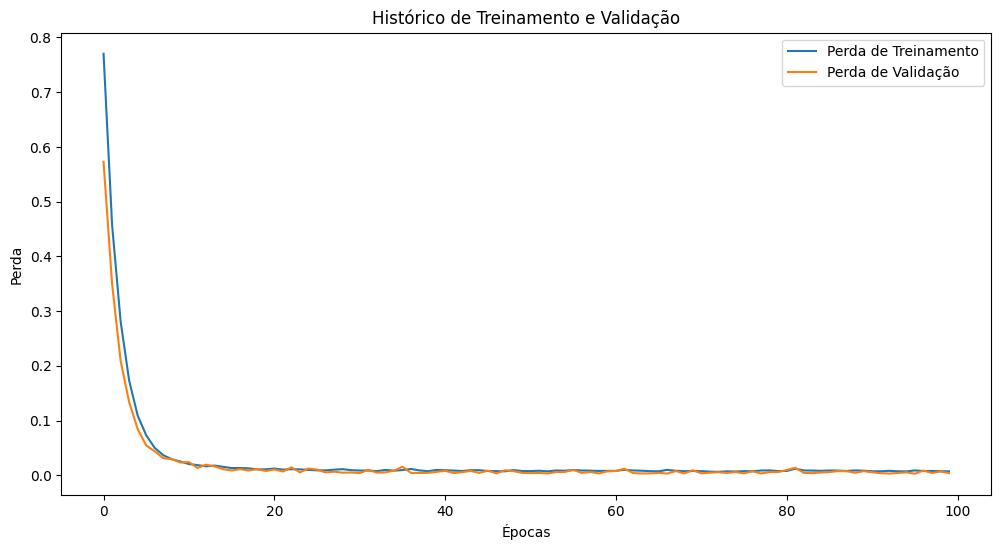

In [28]:
import matplotlib.pyplot as plt
plt.figure(figsize=(12, 6))

# Plotando a perda de treinamento
plt.plot(history.history['loss'], label='Perda de Treinamento')

# Plotando a perda de validação
plt.plot(history.history['val_loss'], label='Perda de Validação')

# Adicionando título e legendas
plt.title('Histórico de Treinamento e Validação')
plt.xlabel('Épocas')
plt.ylabel('Perda')
plt.legend()

# Exibindo o gráfico
plt.show()

In [29]:
# Fazendo previsões
train_predict = model.predict(X_train)
test_predict = model.predict(X_test)

# Invertendo a normalização para obter os valores reais
train_predict = scaler_y.inverse_transform(train_predict)
test_predict = scaler_y.inverse_transform(test_predict)
y_train = scaler_y.inverse_transform(y_train.reshape(-1, 1))
y_test = scaler_y.inverse_transform(y_test.reshape(-1, 1))

30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 20ms/step
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step


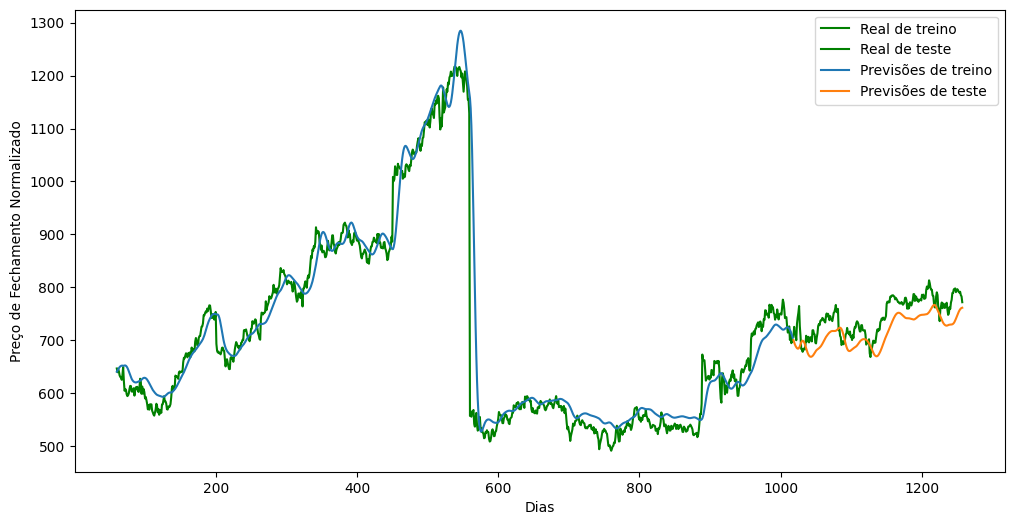

In [30]:
# Plotando os resultados
plt.figure(figsize=(12, 6))
train_range = range(lookback, lookback + len(train_predict))
test_range = range(lookback + len(train_predict), lookback + len(train_predict) + len(test_predict))
plt.plot(train_range, y_train, label='Real de treino', color='green')
plt.plot(test_range, y_test, label='Real de teste', color='green')
plt.plot(train_range, train_predict, label='Previsões de treino')
plt.plot(test_range, test_predict, label='Previsões de teste')
plt.xlabel('Dias')
plt.ylabel('Preço de Fechamento Normalizado')
plt.legend()
plt.show()

In [31]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

def regression_metrics(y_test, test_predict):
    # Calculando MAE
    mae = mean_absolute_error(y_test, test_predict)
    
    # Calculando MSE
    mse = mean_squared_error(y_test, test_predict)
    
    # Calculando RMSE
    rmse = np.sqrt(mse)
    
    # Calculando R²
    r2 = r2_score(y_test, test_predict)
    
    # Exibindo os resultados
    print(f'Mean Absolute Error (MAE): {mae}')
    print(f'Mean Squared Error (MSE): {mse}')
    print(f'Root Mean Squared Error (RMSE): {rmse}')
    print(f'Coefficient of Determination (R²): {r2}')

In [32]:
regression_metrics(y_test, test_predict)

Mean Absolute Error (MAE): 31.4720046895345
Mean Squared Error (MSE): 1209.7000841176382
Root Mean Squared Error (RMSE): 34.78074300698072
Coefficient of Determination (R²): -0.013102927511079887


In [33]:
regression_metrics(y_train, train_predict)

Mean Absolute Error (MAE): 26.752941043352035
Mean Squared Error (MSE): 2716.5441625730427
Root Mean Squared Error (RMSE): 52.12047738243619
Coefficient of Determination (R²): 0.9210556017272604


In [34]:
df = pd.read_csv('clima_tempo.csv')

FileNotFoundError: [Errno 2] No such file or directory: 'clima_tempo.csv'

## Exercícios de Análise de Séries Temporais da temperatura da Índia

1. **Leitura dos Dados**
   - Leia a base de dados clima_tempo.csv.

2. **Seleção dos Dados**
   - Use todos os dados exceto a coluna de data (Mas antes coloque os dados em ordem crescente de data).

3. **Definição de X e Y**
   - Defina `X` e `y` considerando o valor dos últimos 10 dias para previsão.

4. **Separação em Treinamento e Teste**
   - Separe os dados em conjuntos de treinamento e teste, utilizando 15% das datas mais recentes para o conjunto de teste.

5. **Normalização dos Dados de Treinamento**
   - Normalize `X` e `y` de treinamento usando `fit_transform`.

6. **Normalização dos Dados de Teste**
   - Normalize `X` e `y` de teste usando `transform`.

7. **Definição do Modelo**
   - Defina uma estrutura de LSTM para o tratamento dos dados.

8. **Treinamento do Modelo**
   - Treine o modelo utilizando 5% dos dados de treinamento para validação.

9. **Visualização do Histórico de Treinamento**
   - Exiba o gráfico de perda (`loss`) de treinamento e validação.

10. **Previsão com Dados de Teste**
    - Faça previsões utilizando os dados de teste.

11. **Desnormalização das Previsões**
    - Desnormalize as previsões de teste e o `y` de teste para obter valores em escala real.

12. **Exibir as Métricas de Regressão**
    - Exiba as métricas de regressão para avaliar o desempenho do modelo nas previsões.

In [ ]:
df['date'] = pd.to_datetime(df['date'])

In [ ]:
df = df.sort_values(by= 'date')

In [ ]:
import numpy as np
from sklearn.model_selection import train_test_split

def create_lookback_data(df, lookback):
    """
    Função para criar dados de entrada e saída para uma LSTM usando uma janela de lookback.
    
    Parâmetros:
    df (DataFrame): DataFrame contendo os dados. A última coluna é a coluna alvo.
    lookback (int): Número de dias para a janela de lookback.
    
    Retorna:
    X (numpy array): Dados de entrada para a LSTM, de formato (n_amostras, lookback, n_features).
    y (numpy array): Dados de saída/targets, de formato (n_amostras,).
    """
    data = df.values
    X, y = [], []
    
    for i in range(lookback, len(data)):
        X.append(data[i - lookback:i, :-1])  # Todas as colunas exceto a última (características)
        y.append(data[i, -1])                # Apenas a última coluna (alvo)
    
    return np.array(X), np.array(y)

# Supondo que 'df' é o seu DataFrame já carregado e pré-processado
lookback = 10  # Definindo a janela de lookback para 10 dias
X, y = create_lookback_data(df, lookback)

# Separando os conjuntos de treinamento e teste (15% para teste)
test_size = 0.15
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size, shuffle=False)

# Agora X_train, y_train, X_test e y_test estão prontos para serem usados no treinamento e teste do modelo.



In [ ]:
# Supondo que 'df' é o seu DataFrame já carregado e pré-processado
lookback = 10  # Definindo a janela de lookback para 10 dias
X, y = create_lookback_data(df, lookback)


In [ ]:
from sklearn.preprocessing import MinMaxScaler

# Criando o objeto MinMaxScaler
scaler = MinMaxScaler()

# Normalizando os dados de treinamento
# É importante ajustar o scaler apenas com os dados de treinamento para evitar vazamento de dados
X_train_scaled = scaler.fit_transform(X_train.reshape(-1, X_train.shape[-1])).reshape(X_train.shape)
y_train_scaled = scaler.fit_transform(y_train.reshape(-1, 1)).reshape(-1)

# Agora X_train_scaled e y_train_scaled estão normalizados e prontos para serem usados no treinamento do modelo.


In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout
from tensorflow.keras.regularizers import l2

# Definindo a arquitetura do modelo LSTM
model = Sequential()

# Adicionando a primeira camada LSTM
# 50 unidades, ativação tanh, com return_sequences=True para retornar todas as saídas da sequência
# Aplicando regularização de kernel l2 para evitar overfitting
# input_shape=(timesteps, features) - use a forma dos seus dados de entrada
model.add(LSTM(units=50, activation='tanh', return_sequences=True, 
               kernel_regularizer=l2(0.01), input_shape=(X_train.shape[1], X_train.shape[2])))

# Adicionando uma camada Dropout com taxa de 0.2 para evitar overfitting
model.add(Dropout(0.2))

# Adicionando a segunda camada LSTM
# 50 unidades, ativação tanh, sem return_sequences porque é a última camada LSTM antes da camada densa
# Aplicando regularização de kernel l2
model.add(LSTM(units=50, activation='tanh', kernel_regularizer=l2(0.01)))

# Adicionando uma segunda camada Dropout com taxa de 0.2 para regularização adicional
model.add(Dropout(0.2))

# Adicionando uma camada densa (fully connected) com 1 unidade para gerar a previsão final do modelo
model.add(Dense(units=1))

# Compilando o modelo com otimizador adam e função de perda mean_squared_error
model.compile(optimizer='adam', loss='mean_squared_error')

# Exibindo a arquitetura do modelo
model.summary()